In [1]:
import sys
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
import os
import cv2
import numpy as np

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf

sys.path.append('Datasets')
from StanfordDataset import StanfordDataset

sys.path.append('config')
import settings

sys.path.append('Preprocessings')
from StanfordPreprocessing import StanfordPreprocessing

sys.path.append('Postprocessing')
from StanfordPostprocess import postprocess_label

sys.path.append('Models')
from InceptionV3 import InceptionV3

import matplotlib.pyplot as plt

In [2]:
def read_labels(path):
    with open(path, 'r') as file:
        data = file.read()
    
    return np.array(data.split('\n'))

preprocessor = StanfordPreprocessing(read_labels(settings.LABELS_PATH), settings.IMAGE_HEIGHT, settings.IMAGE_WIDTH)

In [60]:
model = tf.keras.models.load_model("Artifacts/Models/v2/Model/tf")
model.summary()

KeyboardInterrupt: 

In [ ]:
stanfordDataset = StanfordDataset(
    data_path=settings.DATA_PATH,
    label_path=settings.LABELS_PATH,
    batch_size=32
)

(train_ds, val_ds, test_ds) = stanfordDataset.create_data_pipelines(preprocessor)

In [ ]:
model.evaluate(test_ds)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

1/1 [==============================] - 3s 3s/step


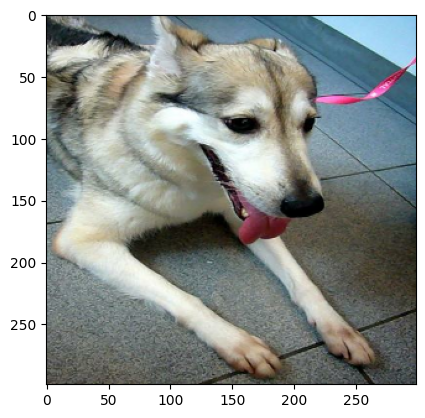

True label = Siberian husky
Predicted label = Siberian husky


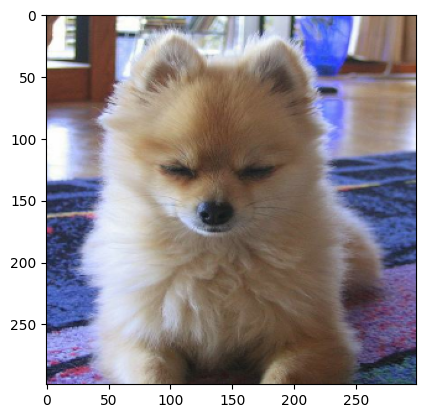

True label = Pomeranian
Predicted label = Pomeranian


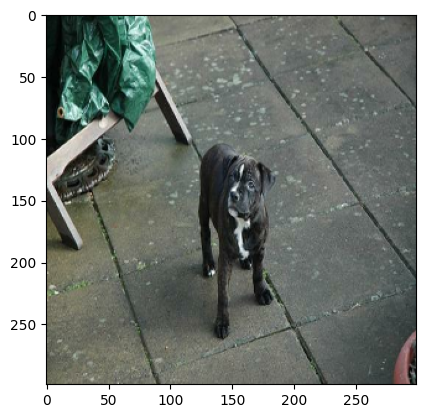

True label = Staffordshire bullterrier
Predicted label = Staffordshire bullterrier


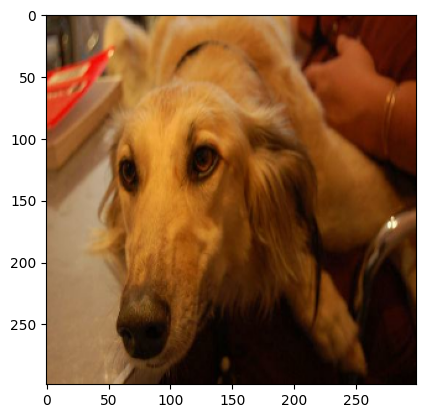

True label = Saluki
Predicted label = Saluki


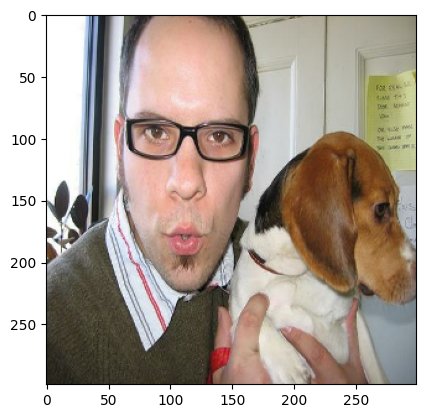

True label = Beagle
Predicted label = Beagle


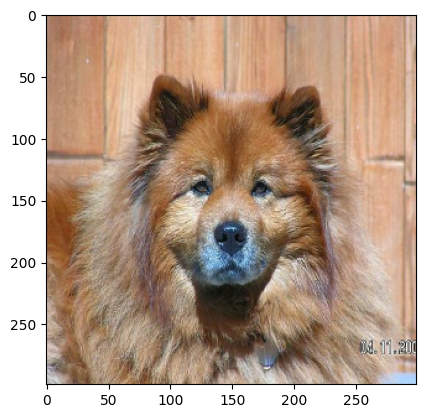

True label = Chow
Predicted label = Chow


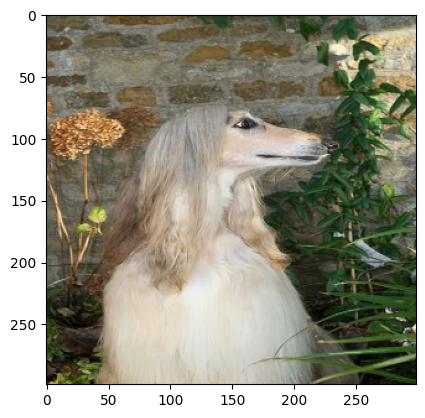

True label = Afghan hound
Predicted label = Afghan hound


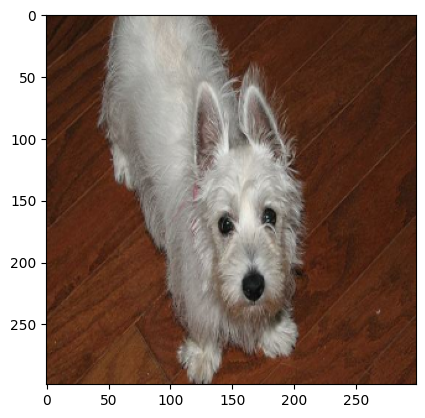

True label = West highland white terrier
Predicted label = West highland white terrier


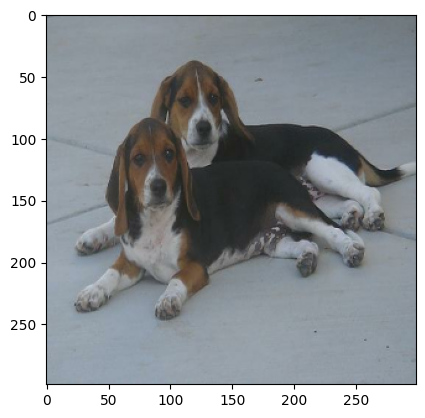

True label = Beagle
Predicted label = Beagle


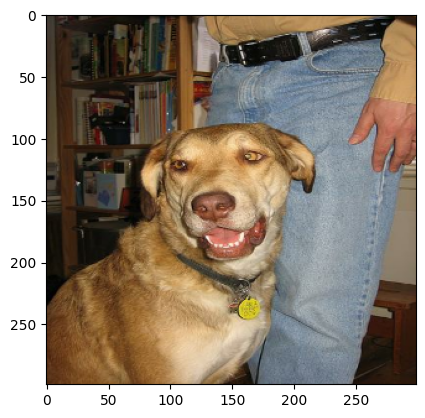

True label = Chesapeake bay retriever
Predicted label = Chesapeake bay retriever


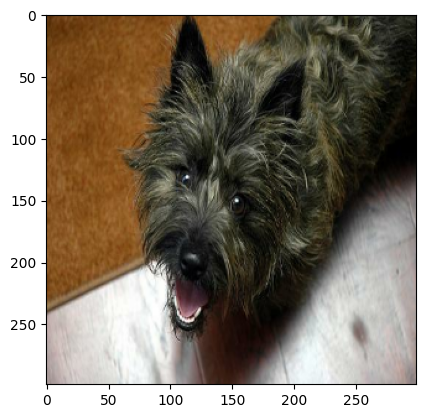

True label = Cairn
Predicted label = Cairn


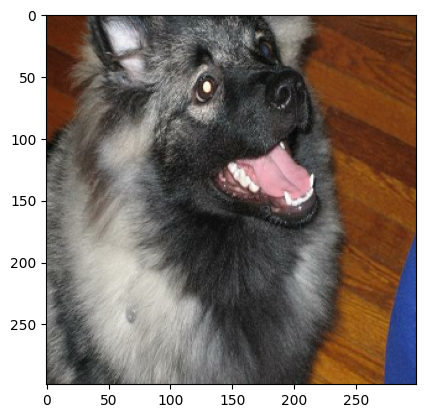

True label = Keeshond
Predicted label = Keeshond


In [7]:
class_names = read_labels(settings.LABELS_PATH)

for images, true_classes in test_ds.take(1):
    predictions = model.predict(images)[1]
    true_classes = true_classes.numpy()
    classes = np.argmax(predictions, axis=1)
    for index, img in enumerate(images):
        img = img.numpy()
        imgplot = plt.imshow(images[index].numpy().astype('uint8'))
        plt.show()
        print('True label =', postprocess_label(class_names[true_classes[index]]))
        print('Predicted label =', postprocess_label(class_names[classes[index]]))
        if(index > 10):
            break

In [42]:
def recognize(path):
    class_names = read_labels(settings.LABELS_PATH)
    img = preprocessor.process_single_img(path)
    predictions = model.predict(tf.expand_dims(img, axis=0))[0]
    classes = np.argmax(predictions, axis=1).squeeze()
    imgplot = plt.imshow(img.numpy().astype('uint8'))
    plt.show()
    print(postprocess_label(class_names[classes]))

1/1 [==============================] - 0s 144ms/step


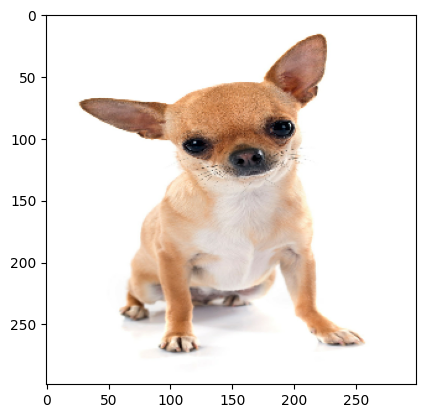

Chihuahua
1/1 [==============================] - 0s 135ms/step


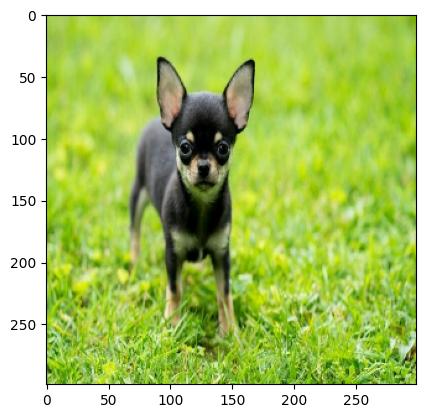

Staffordshire bullterrier
1/1 [==============================] - 0s 109ms/step


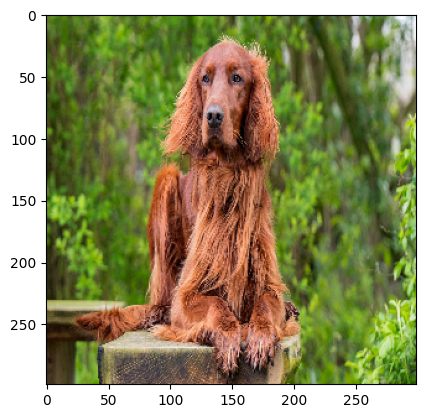

Irish setter
1/1 [==============================] - 0s 112ms/step


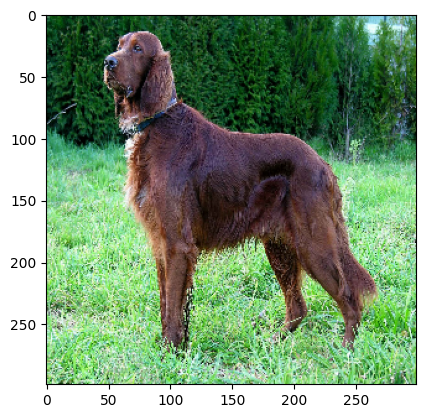

Sussex spaniel
1/1 [==============================] - 0s 113ms/step


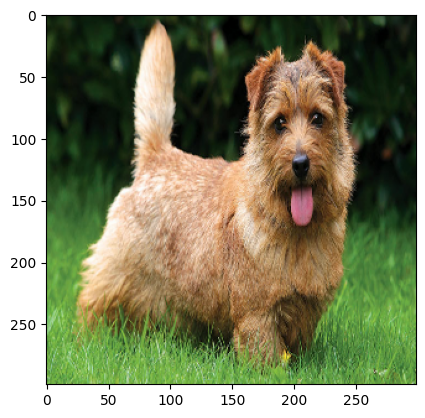

Norfolk terrier
1/1 [==============================] - 0s 121ms/step


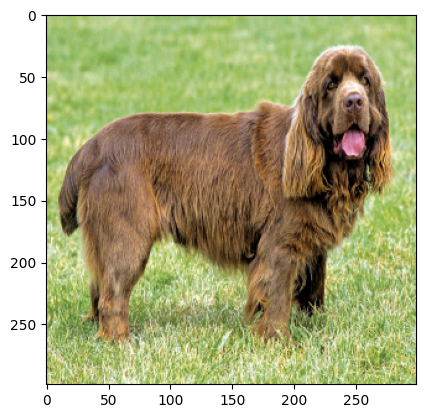

Sussex spaniel


In [54]:
recognize('Data/TestInference/chihuahua_1.jpg')
recognize('Data/TestInference/chihuahua_2.jpg')
recognize('Data/TestInference/irish_setter_1.jpg')
recognize('Data/TestInference/irish_setter_2.jpg')
recognize('Data/TestInference/norfolk_terier.jpg')
recognize('Data/TestInference/susseks_spaniel.jpg')

In [61]:
model = InceptionV3((299, 299, 3), 120)

In [63]:
model.load_weights('Artifacts/Models/v1/Model/tf')

#values for schedules
initial_learning_rate = 10**(-2)
final_learning_rate = 10**(-4)
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/50)
steps_per_epoch = len(train_ds)

learning_rate = lr
if(lr == -1):
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
                    initial_learning_rate=initial_learning_rate,
                    decay_steps=steps_per_epoch,
                    decay_rate=learning_rate_decay_factor
                )


model.compile(loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'], 
                optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate))

KeyboardInterrupt: 

In [58]:
model.save('Artifacts/Models/v2/Model/tf')

INFO:tensorflow:Assets written to: Artifacts/Models/v2/Model/tf/assets


INFO:tensorflow:Assets written to: Artifacts/Models/v2/Model/tf/assets
